In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style="darkgrid")
pd.set_option('display.max_columns', 0)
plt.style.use('ggplot')
pd.options.display.float_format = '{:.2f}'.format
import math
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import graphviz
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
import random
import gzip
import category_encoders as ce
pd.options.display.float_format = '{:.2f}'.format


num_records = 40428967
sample_size = 5000000
skip_values = sorted(random.sample(range(1,num_records), num_records - sample_size))
parse_date = lambda val : pd.datetime.strptime(val, '%y%m%d%H')

In [152]:
train = pd.read_csv('../../Click-Through Rate Prediction/data/data/train.gz', parse_dates=['hour'], date_parser=parse_date,\
                     skiprows=skip_values)

train.head()

id  click       hour    C1  ...  C18  C19     C20  C21
0   1000009418151094273      0 2014-10-21  1005  ...    0   35      -1   79
1  10001868339616595934      0 2014-10-21  1005  ...    2   39  100019   33
2  10002044883120869786      0 2014-10-21  1005  ...    0  687  100077   48
3  10005609489911213467      1 2014-10-21  1005  ...    3  297  100111   61
4  10005649443863261125      0 2014-10-21  1005  ...    0   39      -1  157

[5 rows x 24 columns]

In [153]:
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 24 columns):
 #   Column            Dtype         
---  ------            -----         
 0   id                uint64        
 1   click             int64         
 2   hour              datetime64[ns]
 3   C1                int64         
 4   banner_pos        int64         
 5   site_id           object        
 6   site_domain       object        
 7   site_category     object        
 8   app_id            object        
 9   app_domain        object        
 10  app_category      object        
 11  device_id         object        
 12  device_ip         object        
 13  device_model      object        
 14  device_type       int64         
 15  device_conn_type  int64         
 16  C14               int64         
 17  C15               int64         
 18  C16               int64         
 19  C17               int64         
 20  C18               int64         
 21  C19     

id      click  ...        C20        C21
count              5000000.00 5000000.00  ... 5000000.00 5000000.00
mean   9226356646396082176.00       0.17  ...   53197.93      83.39
std    5324311477847584768.00       0.38  ...   49958.03      70.27
min          2219877217461.00       0.00  ...      -1.00       1.00
25%    4619206653141168128.00       0.00  ...      -1.00      23.00
50%    9226337540991041536.00       0.00  ...  100048.00      61.00
75%   13839303982264379392.00       0.00  ...  100093.00     101.00
max   18446739678770976768.00       1.00  ...  100248.00     255.00

[8 rows x 14 columns]

In [154]:
test = pd.read_csv('../../Click-Through Rate Prediction/data/data/test.gz', parse_dates=['hour'], date_parser=parse_date,\
                     skiprows=skip_values)

test.head()

id       hour    C1  banner_pos  ... C18  C19     C20  C21
0  10000174058809263569 2014-10-31  1005           0  ...   3  175  100075   23
1  10002121728305927027 2014-10-31  1005           0  ...   0  431  100084  221
2  10002614093820007721 2014-10-31  1005           0  ...   3   39      -1   23
3  10005270909407257114 2014-10-31  1005           0  ...   3   39      -1   23
4  10005321853961183294 2014-10-31  1005           1  ...   2   39  100074   32

[5 rows x 23 columns]

In [155]:
test.info()
test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566033 entries, 0 to 566032
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                566033 non-null  uint64        
 1   hour              566033 non-null  datetime64[ns]
 2   C1                566033 non-null  int64         
 3   banner_pos        566033 non-null  int64         
 4   site_id           566033 non-null  object        
 5   site_domain       566033 non-null  object        
 6   site_category     566033 non-null  object        
 7   app_id            566033 non-null  object        
 8   app_domain        566033 non-null  object        
 9   app_category      566033 non-null  object        
 10  device_id         566033 non-null  object        
 11  device_ip         566033 non-null  object        
 12  device_model      566033 non-null  object        
 13  device_type       566033 non-null  int64         
 14  devi

id        C1  ...       C20       C21
count               566033.00 566033.00  ... 566033.00 566033.00
mean   9228161749830356992.00   1004.99  ...  53407.62     92.00
std    5328009515750016000.00      0.93  ...  49948.48     83.93
min        156119365233222.00   1001.00  ...     -1.00     13.00
25%    4610911826751407616.00   1005.00  ...     -1.00     23.00
50%    9236456470958520320.00   1005.00  ... 100074.00     51.00
75%   13842065539039330304.00   1005.00  ... 100111.00    221.00
max   18446675529022449664.00   1012.00  ... 100248.00    255.00

[8 rows x 13 columns]

In [156]:
train['month'] = train['hour'].dt.month
train['dayofweek'] = train['hour'].dt.dayofweek
train['day'] = train['hour'].dt.day
train['hour_time'] = train['hour'].dt.hour

train.describe()

id      click  ...        day  hour_time
count              5000000.00 5000000.00  ... 5000000.00 5000000.00
mean   9226356646396082176.00       0.17  ...      25.47      11.28
std    5324311477847584768.00       0.38  ...       2.96       5.95
min          2219877217461.00       0.00  ...      21.00       0.00
25%    4619206653141168128.00       0.00  ...      23.00       6.00
50%    9226337540991041536.00       0.00  ...      26.00      11.00
75%   13839303982264379392.00       0.00  ...      28.00      16.00
max   18446739678770976768.00       1.00  ...      30.00      23.00

[8 rows x 18 columns]

In [157]:
test['month'] = test['hour'].dt.month
test['dayofweek'] = test['hour'].dt.dayofweek
test['day'] = test['hour'].dt.day
test['hour_time'] = test['hour'].dt.hour

test.describe()

id        C1  ...       day  hour_time
count               566033.00 566033.00  ... 566033.00  566033.00
mean   9228161749830356992.00   1004.99  ...     31.00      11.61
std    5328009515750016000.00      0.93  ...      0.00       5.70
min        156119365233222.00   1001.00  ...     31.00       0.00
25%    4610911826751407616.00   1005.00  ...     31.00       7.00
50%    9236456470958520320.00   1005.00  ...     31.00      12.00
75%   13842065539039330304.00   1005.00  ...     31.00      16.00
max   18446675529022449664.00   1012.00  ...     31.00      23.00

[8 rows x 17 columns]

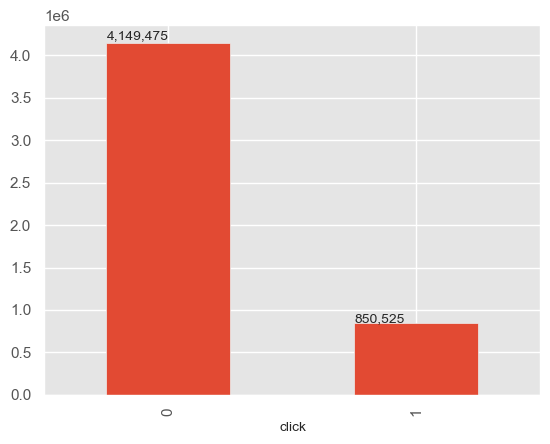

In [158]:
train.drop(['month', 'hour'], axis = 1, inplace = True)
test.drop(['month', 'hour'], axis = 1, inplace = True)

ax = train.groupby('click').size().plot(kind = 'bar')

for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

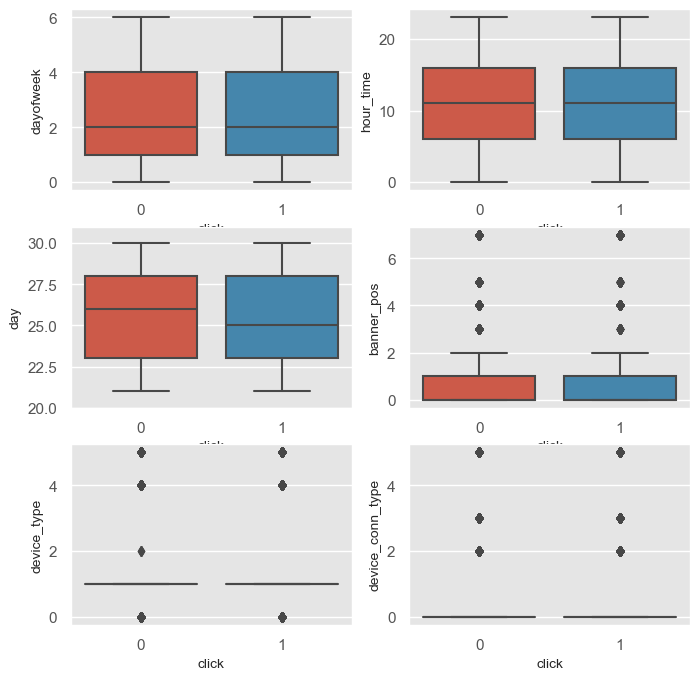

In [159]:
fig, axs = plt.subplots(3, 2, figsize=(8, 8))
# tmp = dt.loc[(dt.type == 'TRANSFER'), :]

a = sns.boxplot(x = 'click', y = 'dayofweek', data = train, ax=axs[0][0])
b = sns.boxplot(x = 'click', y = 'hour_time', data = train, ax=axs[0][1])
c = sns.boxplot(x = 'click', y = 'day', data=train, ax=axs[1][0])
axs[1][0].set(ylim=(20, 31))
d = sns.boxplot(x = 'click', y = 'banner_pos', data = train, ax = axs[1][1])
e = sns.boxplot(x = 'click', y = 'device_type', data = train, ax = axs[2][0])
f = sns.boxplot(x = 'click', y = 'device_conn_type', data = train, ax = axs[2][1])

# d = sns.regplot(x = 'click', y = 'amount', data=tmp.loc[(tmp.isFlaggedFraud ==1), :], ax=axs[1][1])
plt.show()

In [161]:
print(train.site_id.value_counts(normalize = True))
print(train.site_domain.value_counts(normalize = True))
print(train.site_category.value_counts(normalize = True))

85f751fd   0.36
1fbe01fe   0.16
e151e245   0.07
d9750ee7   0.02
5b08c53b   0.02
           ... 
b5165f9e   0.00
2fa09087   0.00
9ca3186e   0.00
4f067001   0.00
3a42deb7   0.00
Name: site_id, Length: 3543, dtype: float64
c4e18dd6   0.37
f3845767   0.16
7e091613   0.08
7687a86e   0.03
98572c79   0.02
           ... 
a0f44690   0.00
49cb396e   0.00
1ac1aa5d   0.00
725fca3e   0.00
d761e9fb   0.00
Name: site_domain, Length: 4518, dtype: float64
50e219e0   0.41
f028772b   0.31
28905ebd   0.18
3e814130   0.08
f66779e6   0.01
75fa27f6   0.00
335d28a8   0.00
76b2941d   0.00
c0dd3be3   0.00
72722551   0.00
dedf689d   0.00
70fb0e29   0.00
0569f928   0.00
8fd0aea4   0.00
a818d37a   0.00
42a36e14   0.00
e787de0e   0.00
bcf865d9   0.00
5378d028   0.00
9ccfa2ea   0.00
74073276   0.00
c706e647   0.00
da34532e   0.00
Name: site_category, dtype: float64


In [162]:
print(train.app_id.value_counts(normalize = True))
print(train.app_domain.value_counts(normalize = True))
print(train.app_category.value_counts(normalize = True))

ecad2386   0.64
92f5800b   0.04
e2fcccd2   0.03
febd1138   0.02
9c13b419   0.02
           ... 
6d7421f2   0.00
8ebf91be   0.00
e1f5dfb4   0.00
8a38db9c   0.00
40dc74b7   0.00
Name: app_id, Length: 5207, dtype: float64
7801e8d9   0.67
2347f47a   0.13
ae637522   0.05
5c5a694b   0.03
82e27996   0.02
           ... 
7cf770da   0.00
224d4dec   0.00
c343527e   0.00
55240cf0   0.00
6dea6e92   0.00
Name: app_domain, Length: 328, dtype: float64
07d7df22   0.65
0f2161f8   0.24
cef3e649   0.04
8ded1f7a   0.04
f95efa07   0.03
d1327cf5   0.00
dc97ec06   0.00
09481d60   0.00
75d80bbe   0.00
fc6fa53d   0.00
4ce2e9fc   0.00
879c24eb   0.00
a3c42688   0.00
4681bb9d   0.00
0f9a328c   0.00
a86a3e89   0.00
2281a340   0.00
8df2e842   0.00
79f0b860   0.00
0bfbc358   0.00
a7fd01ec   0.00
7113d72a   0.00
2fc4f2aa   0.00
18b1e0be   0.00
5326cf99   0.00
4b7ade46   0.00
0d82db25   0.00
6fea3693   0.00
bd41f328   0.00
bf8ac856   0.00
ef03ae90   0.00
Name: app_category, dtype: float64


In [163]:
print(train.device_id.value_counts(normalize = True))
print(train.device_ip.value_counts(normalize = True))
print(train.device_model.value_counts(normalize = True))

a99f214a   0.83
0f7c61dc   0.00
c357dbff   0.00
936e92fb   0.00
afeffc18   0.00
           ... 
207af40e   0.00
4f9a628a   0.00
4ff5f199   0.00
3687de76   0.00
9ecd8d1b   0.00
Name: device_id, Length: 598927, dtype: float64
6b9769f2   0.01
431b3174   0.00
af9205f9   0.00
2f323f36   0.00
af62faf4   0.00
           ... 
ee3cd9d6   0.00
116f5e48   0.00
5df4c06a   0.00
2b15e786   0.00
56e0135b   0.00
Name: device_ip, Length: 1903564, dtype: float64
8a4875bd   0.06
1f0bc64f   0.04
d787e91b   0.03
76dc4769   0.02
be6db1d7   0.02
           ... 
e3a226e6   0.00
a214550e   0.00
0419df25   0.00
42989ebc   0.00
f546658d   0.00
Name: device_model, Length: 6555, dtype: float64


In [164]:
print(train.C1.value_counts(normalize = True))
print(train.C14.value_counts(normalize = True))
print(train.C15.value_counts(normalize = True))
print(train.C16.value_counts(normalize = True))
print(train.C17.value_counts(normalize = True))
print(train.C18.value_counts(normalize = True))
print(train.C19.value_counts(normalize = True))
print(train.C20.value_counts(normalize = True))
print(train.C21.value_counts(normalize = True))

1005   0.92
1002   0.05
1010   0.02
1012   0.00
1007   0.00
1001   0.00
1008   0.00
Name: C1, dtype: float64
4687    0.02
21611   0.02
21191   0.02
21189   0.02
19772   0.02
        ... 
12201   0.00
12210   0.00
22217   0.00
18462   0.00
23679   0.00
Name: C14, Length: 2458, dtype: float64
320    0.93
300    0.06
216    0.01
728    0.00
120    0.00
1024   0.00
480    0.00
768    0.00
Name: C15, dtype: float64
50     0.94
250    0.04
36     0.01
480    0.00
90     0.00
20     0.00
768    0.00
320    0.00
1024   0.00
Name: C16, dtype: float64
1722   0.11
2424   0.04
2227   0.04
1800   0.03
423    0.02
       ... 
2575   0.00
2346   0.00
2567   0.00
2448   0.00
644    0.00
Name: C17, Length: 427, dtype: float64
0   0.42
3   0.34
2   0.18
1   0.07
Name: C18, dtype: float64
35     0.30
39     0.22
167    0.08
161    0.04
47     0.04
       ... 
1195   0.00
1447   0.00
545    0.00
677    0.00
1959   0.00
Name: C19, Length: 68, dtype: float64
-1        0.47
 100084   0.06
 100148   0.04
 100

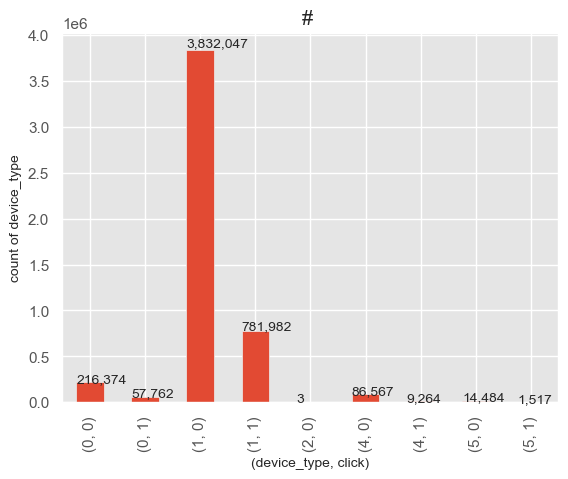

In [165]:
ax = train.groupby(['device_type', 'click']).size().plot(kind='bar')
ax.set_title("# ")
ax.set_xlabel("(device_type, click)")
ax.set_ylabel("count of device_type")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

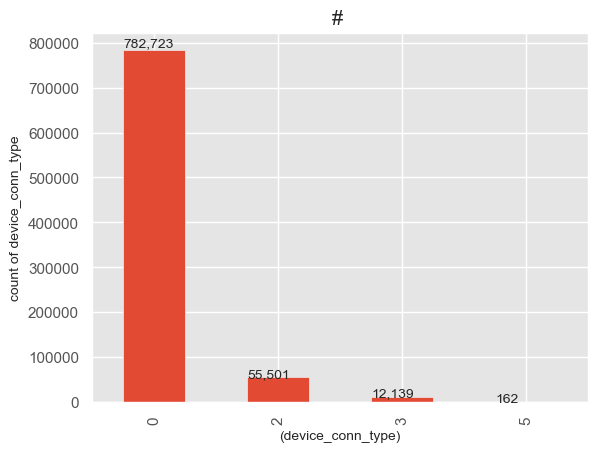

In [176]:
tmp = train.loc[(train.click == 1), :]

ax = tmp.groupby(['device_conn_type']).size().plot(kind='bar')
ax.set_title("# ")
ax.set_xlabel("(device_conn_type)")
ax.set_ylabel("count of device_conn_type")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

<Axes: >

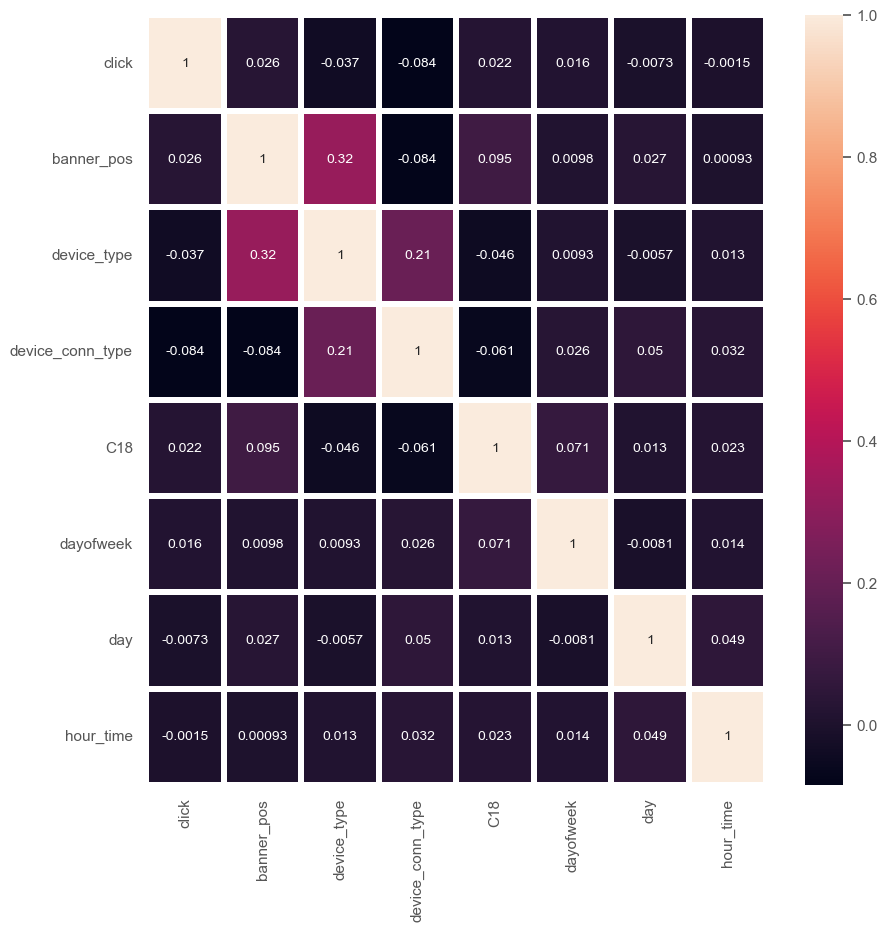

In [167]:
# sns.heatmap(train.corr())

train.drop(['id', 'C1', 'C14', 'C15', 'C16', 'C17', 'C19','C20', 'C21'], axis = 1, inplace = True)
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(train.corr(), ax=ax, annot=True,linewidths=3)

In [168]:
from sklearn import preprocessing
